<h1 class="list-group-item active" style='background:skyblue; border:0'>
    <center>Problem Statement</center>
</h1>

$\bullet$One of the finest feeling is to help the disabled .

 $\bullet$In this very project ,using opencv and depping learning , the machine is going to predict the American sign language ,mimicking  any human brain that can interpret the sign alphabets and can help  the disabled in need .

<h1 class="list-group-item active" style='background:skyblue; border:0'>
    <center>OVERVIEW</center>
</h1>

# Sign Language Classification Problem

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z. The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, 

pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.


# Data Loading

In [ ]:
! pip install -q kaggle # '-q' =>to clear the o/p cell after installing

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemansky","key":"0ae542a17db1b6c29f14bda9016f11a5"}'}

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:

! mkdir ~/.kaggle # making a directory

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:

! cp kaggle.json ~/.kaggle/ # copying the kaggle.json file to the .kaggle directory.

In [ ]:

! chmod 600 ~/.kaggle/kaggle.json # implie , the ower has full right for read and write the file .

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle # Upgrading the kaggle API

     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=195ce0e36315fce8febdfdc1de6c8d13fde7bc8d9211e7df67004c23de4e721f
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle datasets download -d datamunge/sign-language-mnist

 81% 51.0M/62.6M [00:00<00:00, 42.4MB/s]
100% 62.6M/62.6M [00:00<00:00, 98.8MB/s]


In [ ]:
!unzip '/content/sign-language-mnist.zip'

Archive:  /content/sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
!ls # list of the directoriesa and files in current working directory.

american_sign_language.PNG  sample_data		     sign_mnist_train
amer_sign2.png		    sign-language-mnist.zip  sign_mnist_train.csv
amer_sign3.png		    sign_mnist_test
kaggle.json		    sign_mnist_test.csv


# New section

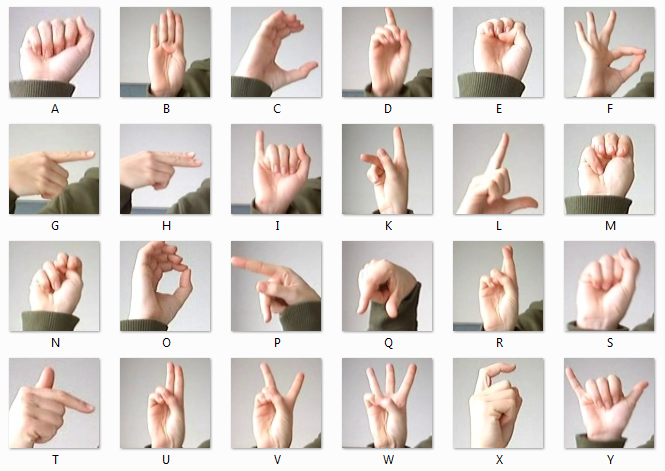

In [ ]:
# example of th data file provided . 
import os
from IPython.display import Image
Image(filename="/content/amer_sign2.png", width= 800, height=500)

<h1> 0. List the Directory </h1>

In [ ]:
# For example, running this will list all files under the input directory

import os
for dirname, dirpaths, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


<h1> 1. Importing important Libraries </h1>

In [ ]:
import csv 
import numpy as np # for linear algebric operations . 
import pandas as pd # for handing the data in the data file .
import seaborn as sns #  for advanced stastical visualisation .
import matplotlib.pyplot as plt # for basic visualisation tool .
import tensorflow as tf # Deep learning library . 
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation .

We need to read the csv train and test inputs. Since we are training these as images, so we need to convert them to images and extract labels from it.

The 1st column of the csv has the label information and the rest are the image pixels.
We'll return the images and labels as numpy array.

Visualising the training.csv file

In [ ]:
x = pd.read_csv('/content/sign_mnist_train.csv').head()
print(f'The number of columns :{x.shape[1]} ,first column is devoted to the label and the last 784 are  for the pixel values of the image ')
x.head()

The number of columns :785 ,first column is devoted to the label and the last 784 are  for the pixel values of the image 


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
with open('/content/sign_mnist_train.csv') as training_file:
        training_reader = csv.reader(training_file, delimiter=',')
        

        image = []
        labels = []
        line_count = 0
        for row in training_reader:
            print(row)
            if line_count == 0:
                line_count +=1
            else:
                labels.append(row[0])
                temp_image = row[1:785]
                image_data_as_array = np.array_split(temp_image, 28)
                image.append(image_data_as_array)
                line_count += 1
        images = np.array(image).astype('float')
        labels = np.array(labels).astype('float')
        print(f'Processed {line_count} lines.')



<h1> 2. Reading the dataset </h1>

In [ ]:
def get_data(filename):
    with open(filename) as training_file:
        training_reader = csv.reader(training_file, delimiter=',')
        image = []
        labels = []
        line_count = 0
        for row in training_reader:
            if line_count == 0: # because the first row contains the clumn names .
                line_count +=1
            else:
                labels.append(row[0])
                temp_image = row[1:785]
                image_data_as_array = np.array_split(temp_image, 28) # dividing the whole list 
                # into 28 sub-arrays.
                image.append(image_data_as_array)
                line_count += 1
        images = np.array(image).astype('float')
        labels = np.array(labels).astype('float')
        print(f'Processed {line_count} lines.')

    return images, labels


training_images, training_labels = get_data("/content/sign_mnist_train.csv")
testing_images, testing_labels = get_data("/content/sign_mnist_test.csv")

print("Total Training images", training_images.shape)
print("Total Training labels",training_labels.shape)
print("Total Testing images",testing_images.shape)
print("Total Testing labels",testing_labels.shape)

Processed 27456 lines.
Processed 7173 lines.
Total Training images (27455, 28, 28)
Total Training labels (27455,)
Total Testing images (7172, 28, 28)
Total Testing labels (7172,)


<h1>3. EDA and Data Visualization </h1>

In [ ]:
alphabets = 'abcdefghijklmnopqrstuvwxyz'
mapping_letter = {}

for i,l in enumerate(alphabets):
  mapping_letter[l] = i
print(mapping_letter.items() ) 


mapping_letter = {v:k for k,v in mapping_letter.items()} #.items() creats a tuple of each key-value pair .


print(mapping_letter)

dict_items([('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7), ('i', 8), ('j', 9), ('k', 10), ('l', 11), ('m', 12), ('n', 13), ('o', 14), ('p', 15), ('q', 16), ('r', 17), ('s', 18), ('t', 19), ('u', 20), ('v', 21), ('w', 22), ('x', 23), ('y', 24), ('z', 25)])
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'}


In [ ]:
training_labels

array([ 3.,  6.,  2., ..., 18., 17., 23.])

In [ ]:
testing_labels

array([ 6.,  5., 10., ...,  2.,  4.,  2.])

AxesSubplot(0.125,0.71587;0.110714x0.16413)
AxesSubplot(0.257857,0.71587;0.110714x0.16413)
AxesSubplot(0.390714,0.71587;0.110714x0.16413)
AxesSubplot(0.523571,0.71587;0.110714x0.16413)
AxesSubplot(0.656429,0.71587;0.110714x0.16413)
AxesSubplot(0.789286,0.71587;0.110714x0.16413)
AxesSubplot(0.125,0.518913;0.110714x0.16413)
AxesSubplot(0.257857,0.518913;0.110714x0.16413)
AxesSubplot(0.390714,0.518913;0.110714x0.16413)
AxesSubplot(0.523571,0.518913;0.110714x0.16413)
AxesSubplot(0.656429,0.518913;0.110714x0.16413)
AxesSubplot(0.789286,0.518913;0.110714x0.16413)
AxesSubplot(0.125,0.321957;0.110714x0.16413)
AxesSubplot(0.257857,0.321957;0.110714x0.16413)
AxesSubplot(0.390714,0.321957;0.110714x0.16413)
AxesSubplot(0.523571,0.321957;0.110714x0.16413)
AxesSubplot(0.656429,0.321957;0.110714x0.16413)
AxesSubplot(0.789286,0.321957;0.110714x0.16413)
AxesSubplot(0.125,0.125;0.110714x0.16413)
AxesSubplot(0.257857,0.125;0.110714x0.16413)
AxesSubplot(0.390714,0.125;0.110714x0.16413)
AxesSubplot(0.52357

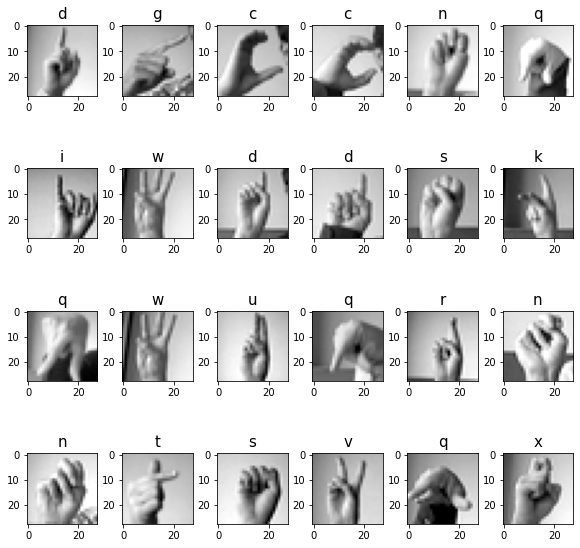

In [ ]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8)
                        )
for i in (axes.flat):
  print(i)

for i, ax in enumerate(axes.flat): #`.flat` :  A 1-D iterator over the array.
    img = training_images[i].reshape(28,28)
    ax.imshow(img, cmap = 'gray')
    title = mapping_letter[training_labels[i]]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
# example of '.flat' attribute

import numpy as np

a = np.array([[2,3],
              [4,5],
              [6,7]])

for i in a.flat:
    print(i)

2
3
4
5
6
7


In [ ]:
vc = pd.Series(training_labels).value_counts() # '.value_counts' return the number of times an unique value appears in a series . 
print(sorted(vc.index))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]


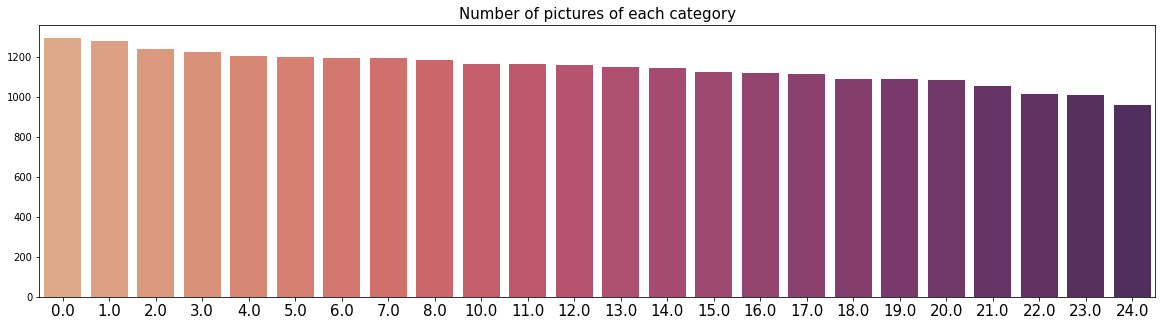

In [ ]:
# Display the distribution of each letter


plt.figure(figsize=(20,5))
sns.barplot(x = sorted(vc.index), y = vc, palette = "flare")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

As you can see that there are 25 categories present in the labels, On careful observation we find that **Z** is not present in the dataset.



Now we need to add another dimension in our images so that we can process it for the **ImageDataGenerator** and do the **Image Augmentation**
Read more [here](https://keras.io/api/preprocessing/image/)

In [ ]:
# for storing accuracy scores for different models .
accuracy_metric = []

<h1> 4. Data Augmentation </h1> 

In [ ]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3) # to add a dimension at third position


print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
training_images[0].shape

(28, 28, 1)

In [ ]:
# example of expand dims

#***********************************$$$$$$$$$$$$$$$$$$$$$****************************
# import numpy
import numpy as np

# using Numpy.expand_dims() method
gfg = np.array([[[1, 2], [7, 8]],[[1, 2], [7, 8]] , [[1, 2], [7, 8]]])
print(gfg)
print(f'hape of the matrix : {gfg.shape}')

gfg = np.expand_dims(gfg, axis = 3)
print(gfg.shape)


[[[1 2]
  [7 8]]

 [[1 2]
  [7 8]]

 [[1 2]
  [7 8]]]
hape of the matrix : (3, 2, 2)
(3, 2, 2, 1)


In [ ]:
# Create an ImageDataGenerator and do Image Augmentation

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   zoom_range=0.1,
                                   shear_range=0.1,
                                   rotation_range=10,
                                   fill_mode='nearest', # for filling ay same padding blank pixels with nearest pixels .
                                   horizontal_flip=True)

#Image Augmentation is not done on the testing data

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_datagenerator = train_datagen.flow(training_images,
                                         training_labels,
                                         batch_size = 32)

validation_datagenerator = validation_datagen.flow(testing_images,
                                                   testing_labels, 
                                                   batch_size=32)


Now lets define a callback for avoiding the excess training and stopping the training based on the predefined condition, in our case, we want training to stop once the **accuracy** is reached above **99%**.

<h1>5.  Define a Callback </h1>

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.8%

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998): # storing  'accuracy' for each epoch .
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

<h1> 6. Defining the model </h1>

In [ ]:
# Define the model

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)), # original is 28*28
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(25, activation = 'softmax')])

I have used 3 Conv2D and 3 MaxPooling2D and the dropout of 0.2

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 512)         590336    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

<h1> 7. Visualise the model </h1>

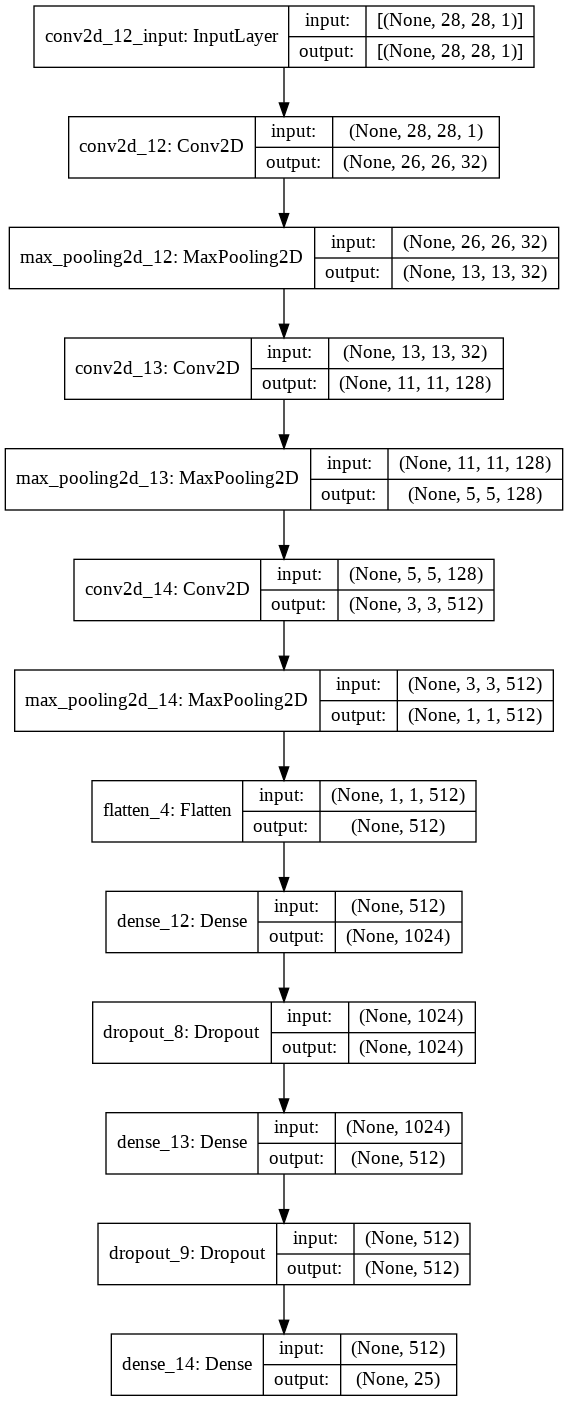

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True,
                          show_dtype=False,
                          show_layer_names=True,
                          rankdir="TB",                          
                          expand_nested=True,
                          dpi=96)

In [ ]:


# Compiling the Model. 
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),  
              metrics = ['accuracy'])

<h1>8. Learning Rate modification </h1>

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,factor=0.25, 
                                            min_lr=0.0001)

<h1> 9. Training Model </h1>

In [ ]:
# Train the Model
callbacks = myCallback()
history = model.fit(train_datagenerator,
                    validation_data = validation_datagenerator,
                    steps_per_epoch = len(training_labels)//32, #=857
                    epochs = 100,
                    validation_steps = len(testing_labels)//32, #=224
                    callbacks = [callbacks, learning_rate_reduction])


Epoch 1/100
857/857 [==============================] - 11s 12ms/step - loss: 2.0736 - accuracy: 0.3222 - val_loss: 0.8826 - val_accuracy: 0.6604
Epoch 2/100
857/857 [==============================] - 11s 12ms/step - loss: 0.6917 - accuracy: 0.7574 - val_loss: 0.3563 - val_accuracy: 0.8708
Epoch 3/100
857/857 [==============================] - 10s 12ms/step - loss: 0.3738 - accuracy: 0.8706 - val_loss: 0.1704 - val_accuracy: 0.9417
Epoch 4/100
857/857 [==============================] - 10s 12ms/step - loss: 0.2434 - accuracy: 0.9178 - val_loss: 0.1621 - val_accuracy: 0.9457
Epoch 5/100
857/857 [==============================] - 10s 12ms/step - loss: 0.1896 - accuracy: 0.9349 - val_loss: 0.0860 - val_accuracy: 0.9731
Epoch 6/100
857/857 [==============================] - 10s 12ms/step - loss: 0.1419 - accuracy: 0.9525 - val_loss: 0.0996 - val_accuracy: 0.9678
Epoch 7/100
857/857 [==============================] - 10s 12ms/step - loss: 0.1258 - accuracy: 0.9583 - val_loss: 0.0551 - val_ac

<h1> 10. Plotiing the losses </h1>

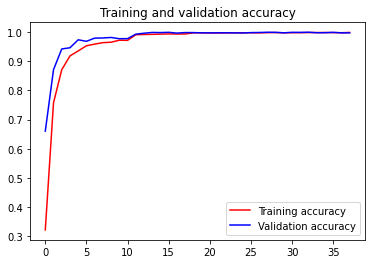

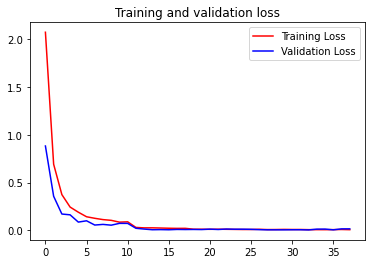

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
fig.set_size_inches(16,9)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(testing_images , testing_labels, verbose=0)

# model.save('sign_language.h5')

[43.02851104736328, 0.9454824328422546]

# <h1>11. Evaluating CNN  Model </h1>

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
# Predict the label of the test_images
pred = model.predict(testing_images)

pred = np.argmax(pred,axis=1)
print(pred)

# Get the accuracy score
acc = accuracy_score(testing_labels,pred)

# Display the results
print(f'## {acc*100:.2f}% accuracy on the test set')
# storing the accuracy score to the list .
accuracy_metric.append(['The accuracy score for CNN = ' , acc])



[ 6  5 10 ...  2  4  2]
## 94.55% accuracy on the test set


In [ ]:
from sklearn.metrics import roc_auc_score as ras # for binary classification only

In [ ]:
# Map the numbers into letters
y_test_letters = [mapping_letter[x] for x in testing_labels]
pred_letters = [mapping_letter[x] for x in pred]

print(classification_report(y_test_letters, pred_letters))

              precision    recall  f1-score   support

           a       1.00      0.93      0.96       331
           b       1.00      0.98      0.99       432
           c       0.98      0.90      0.94       310
           d       1.00      0.97      0.99       245
           e       0.98      1.00      0.99       498
           f       1.00      1.00      1.00       247
           g       0.99      0.99      0.99       348
           h       1.00      0.95      0.98       436
           i       0.94      1.00      0.97       288
           k       1.00      0.79      0.88       331
           l       0.99      1.00      1.00       209
           m       0.94      1.00      0.97       394
           n       0.94      1.00      0.97       291
           o       0.88      1.00      0.94       246
           p       0.89      1.00      0.94       347
           q       0.99      1.00      1.00       164
           r       0.79      0.56      0.66       144
           s       0.62    

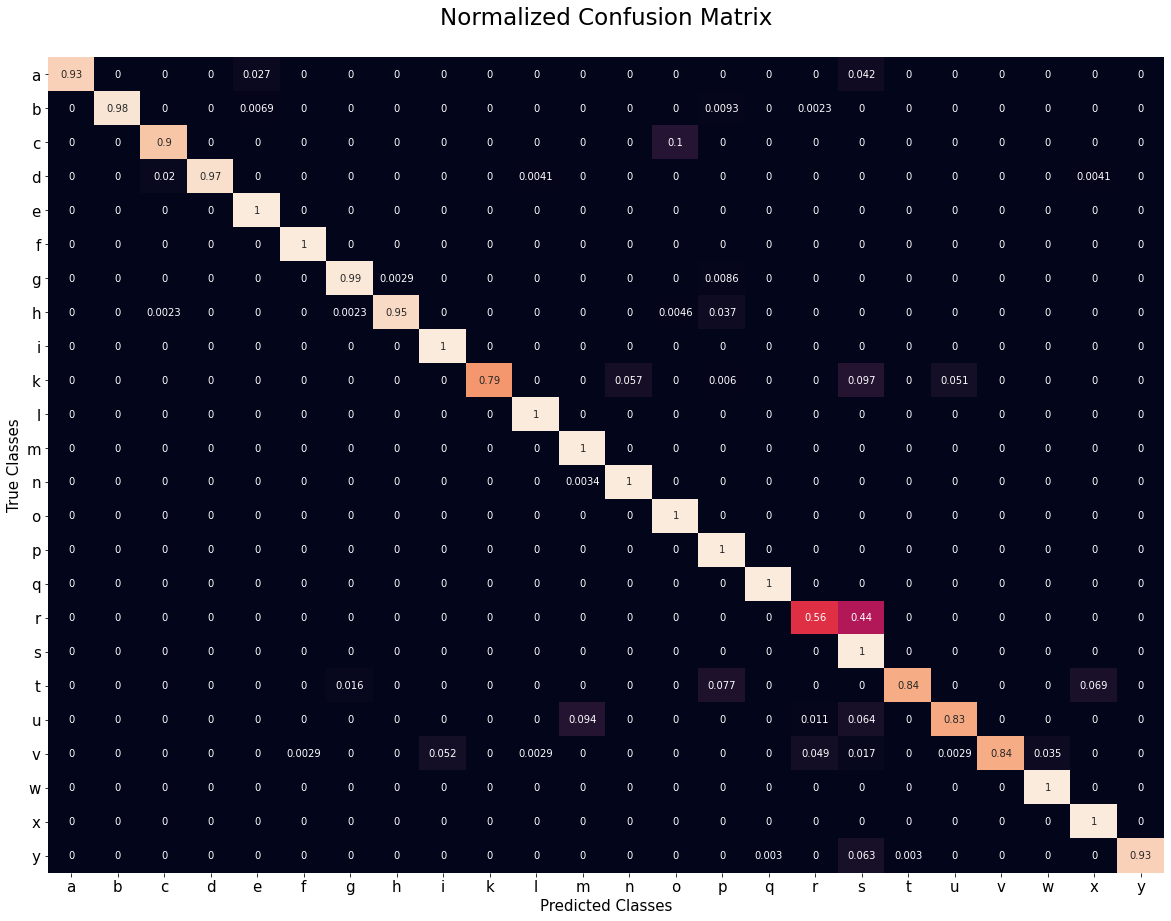

In [ ]:
# Display a confusion matrix
cf_matrix = confusion_matrix(y_test_letters, pred_letters, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test_letters)), yticklabels = sorted(set(y_test_letters)),cbar=False)
plt.title('Normalized Confusion Matrix\n', fontsize = 23)
plt.xlabel("Predicted Classes",fontsize=15)
plt.ylabel("True Classes",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.show()

<h1>12. Outputs sample</h1>

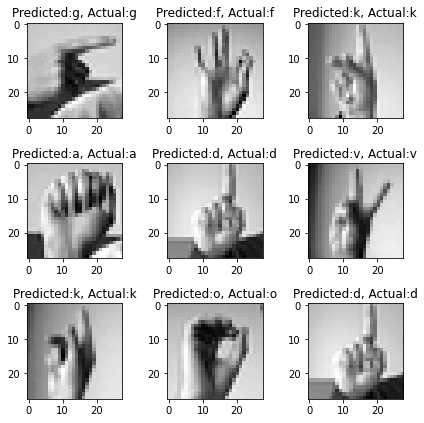

In [ ]:
correct = np.nonzero(pred == testing_labels)[0]
plt.figure(figsize=(6, 6))
i = 0
for c in correct[:9]:
    plt.subplot(3,3,i+1)
    plt.imshow(testing_images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted:{}, Actual:{}".format(pred_letters[c], y_test_letters[c]))
    plt.tight_layout()
    i += 1

#  <h1> 13. VGG MODEL </h1>

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
vgg_model = VGG19(include_top = False , 
                  weights = 'imagenet',
                  input_shape = (32 ,32,3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
input_vgg = training_images.resize(32,32,1)

ValueError: ignored

In [ ]:
vgg_model = tf.keras.applications.vgg19.VGG19(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

#<h1> 14. Making Tabular Data  </h1>

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 16)        528       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
Total params: 592
Trainable params: 592
Non-trainable params: 0
_______________________________________________________________

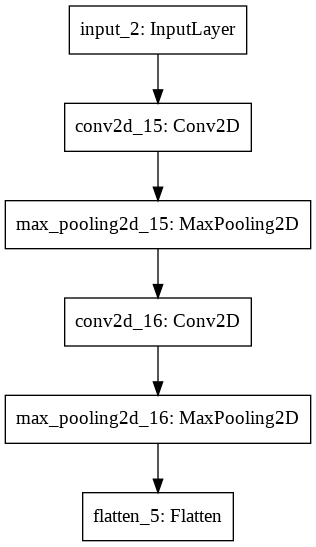

In [ ]:
# Convolutional Neural Network
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
visible = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=1, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=1, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
# hidden1 = Dense(10, activation='relu')(flat)
# output = Dense(1, activation='sigmoid')(hidden1)
model_rnd = Model(inputs=visible, outputs=flat)
# summarize layers
print(model_rnd.summary())
# plot graph
plot_model(model_rnd, to_file='convolutional_neural_network.png')

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_le,test_size=0.5)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)'''

In [ ]:
in_train = model_rnd(training_images)
in_test = model_rnd(testing_images)

# <h1> 15. Random Forest Classifier </h1>

In [ ]:
in_train_rf = np.array(in_train)
in_test_rf = np.array(in_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []
i = 0
# for num_trees in range(100, 150):
rf_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rf_classifier.fit(in_train_rf, training_labels)
i+=1
print(i)

rf_pred = rf_classifier.predict(in_test_rf)

rf_acc.append(accuracy_score(testing_labels,rf_pred))
# rf_cm.append(confusion_matrix(Y_test,rf_pred))

max_acc = max(rf_acc)
# max_acc_cm = rf_cm[rf_acc.index(max_acc)]
print('maximum accuracy = ' + str(max_acc))
# print('confusion matrix = ')
# print(max_acc_cm)
accuracy_metric.append(['RandomForestClassifier', max_acc])
# 0.933 without sc
# accuracy_metric.append(max_acc)

1
maximum accuracy = 0.698968209704406


In [ ]:
rf_pred

array([ 6.,  5., 10., ..., 14., 18., 14.])

In [ ]:
max_acc

0.698968209704406

In [ ]:
print(classification_report(rf_pred , testing_labels))

              precision    recall  f1-score   support

         0.0       0.92      0.75      0.82       406
         1.0       0.79      0.91      0.85       375
         2.0       0.83      0.77      0.80       331
         3.0       0.86      0.73      0.79       289
         4.0       0.80      0.82      0.81       483
         5.0       0.84      0.69      0.76       299
         6.0       0.68      0.92      0.78       260
         7.0       0.94      0.91      0.92       449
         8.0       0.64      0.66      0.65       279
        10.0       0.51      0.79      0.62       214
        11.0       0.86      0.72      0.78       250
        12.0       0.52      0.71      0.60       286
        13.0       0.42      0.58      0.48       210
        14.0       0.49      0.72      0.58       166
        15.0       0.95      0.89      0.92       369
        16.0       1.00      0.84      0.91       195
        17.0       0.60      0.27      0.38       317
        18.0       0.65    

In [ ]:
pred_letters_rf = [mapping_letter[i] for i in rf_pred]
y_test_letters_rf = [mapping_letter[j] for j in testing_labels]

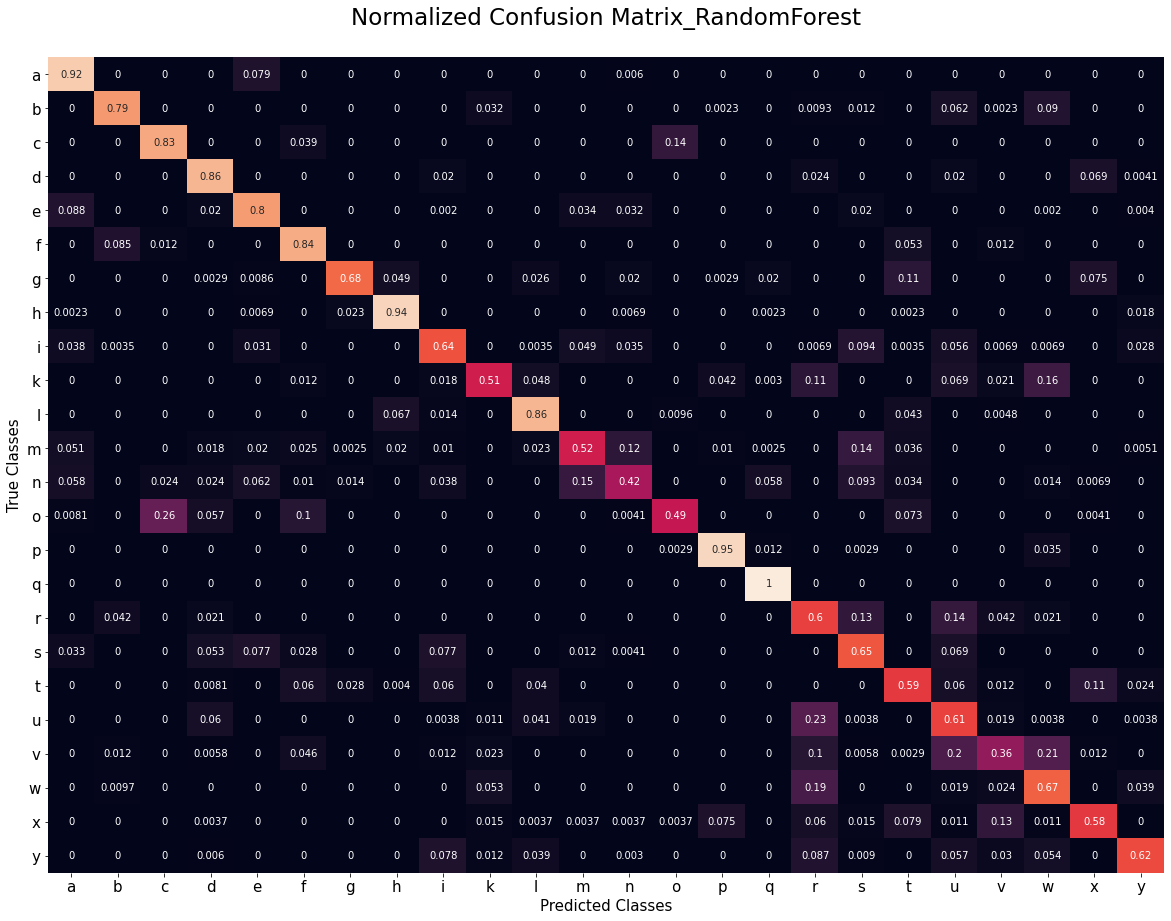

In [ ]:
# confusion Matrix

plt.figure(figsize = (20,15))
cm_rf = confusion_matrix(testing_labels , rf_pred , normalize='true') 
sns.heatmap(cm_rf, annot=True , xticklabels = sorted(set(pred_letters_rf)), yticklabels = sorted(set(y_test_letters_rf)),cbar=False)
plt.title('Normalized Confusion Matrix_RandomForest\n', fontsize = 23)
plt.xlabel("Predicted Classes",fontsize=15)
plt.ylabel("True Classes",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.show()

# <h1> 16 . Naive Bayes Model </h1>

In [ ]:
in_train_NB = np.array(in_train)
in_test_NB = np.array(in_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(in_train_NB, training_labels)
gnb_predictions = gnb.predict(in_test_NB)

accuracy_NB = accuracy_score( gnb_predictions ,testing_labels )
print(f'The accuracy score for the Gussian Naive Bayes Model is :{accuracy_NB} ')
accuracy_metric.append(['Acuracy Score for Naive Bayes is : ' , accuracy_NB])

The accuracy score for the Gussian Naive Bayes Model is :0.2456776352481874 


In [ ]:
testing_labels

array([ 6.,  5., 10., ...,  2.,  4.,  2.])

In [ ]:
gnb_predictions

array([15.,  3., 22., ...,  2.,  4.,  2.])

In [ ]:
print(classification_report(gnb_predictions , testing_labels))

              precision    recall  f1-score   support

         0.0       0.18      0.37      0.24       161
         1.0       0.17      0.60      0.27       124
         2.0       0.49      0.60      0.54       253
         3.0       0.09      0.19      0.12       110
         4.0       0.43      0.20      0.27      1056
         5.0       0.25      0.56      0.34       109
         6.0       0.44      0.43      0.43       351
         7.0       0.18      0.47      0.26       166
         8.0       0.34      0.10      0.15       994
        10.0       0.32      0.26      0.28       408
        11.0       0.45      0.18      0.26       524
        12.0       0.02      0.15      0.04        52
        13.0       0.11      0.12      0.11       250
        14.0       0.28      0.35      0.31       202
        15.0       0.73      0.26      0.38       977
        16.0       0.69      0.61      0.65       184
        17.0       0.41      0.14      0.21       420
        18.0       0.02    

In [ ]:
cm_gnb = confusion_matrix(testing_labels , gnb_predictions , normalize='true')

In [ ]:
y_test_letters_gnb_true = [mapping_letter[i] for i in testing_labels]
y_test_letters_gnb_pred = [mapping_letter[j] for j in gnb_predictions]

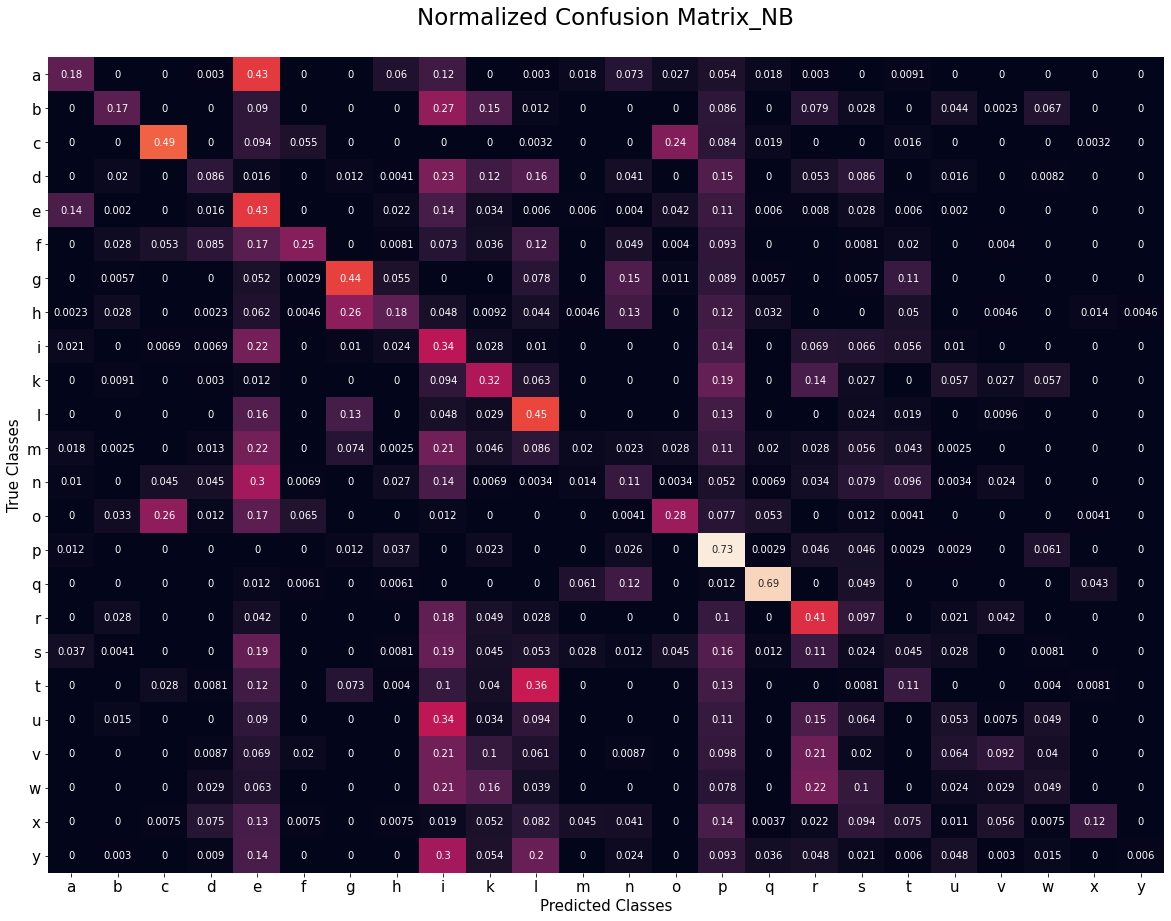

In [ ]:
plt.figure(figsize = (20,15))

sns.heatmap(cm_gnb, annot=True , xticklabels = sorted(set(y_test_letters_gnb_pred)), yticklabels = sorted(set(y_test_letters_gnb_true)),cbar=False)
plt.title('Normalized Confusion Matrix_NB\n', fontsize = 23)
plt.xlabel("Predicted Classes",fontsize=15)
plt.ylabel("True Classes",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.show()

# <h1>17. SVM </h1>

In [ ]:
in_train_SVM = np.array(in_train)

in_test_SVM = np.array(in_test)

In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(in_train_SVM, training_labels)
svm_predictions = svm_model_linear.predict(in_test_SVM)
  

  
# creating a confusion matrix
cm = confusion_matrix(testing_labels, svm_predictions)

In [ ]:
accuracy_SVM = accuracy_score(svm_predictions , testing_labels)

print(f'The accuracy Score for SVM model is :{accuracy_SVM} ')
accuracy_metric.append(['Accuracy for SVM is : ' , accuracy_SVM])

The accuracy Score for SVM model is :0.5931399888455103 


In [ ]:
cm_svm = confusion_matrix(testing_labels, svm_predictions ,normalize = 'true')

In [ ]:
cm_svm

array([[0.63141994, 0.        , 0.        , 0.        , 0.20543807,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12386707, 0.00302115, 0.        ,
        0.        , 0.        , 0.03625378, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.74768519, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00231481, 0.02777778,
        0.        , 0.02314815, 0.        , 0.        , 0.        ,
        0.        , 0.00462963, 0.00925926, 0.        , 0.06481481,
        0.07175926, 0.04861111, 0.        , 0.        ],
       [0.        , 0.        , 0.85483871, 0.        , 0.        ,
        0.02580645, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1       , 0.        ,
        0.        , 0.        , 0.        , 0.01612903, 0.        ,
        0.        , 0.        , 0.00322581, 0.        ],
       [0.   

In [ ]:
mapping_letter

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [ ]:
# Map the numbers into letters
y_test_letters_svm = [mapping_letter[x] for x in testing_labels]
pred_letters_svm = [mapping_letter[x] for x in svm_predictions]


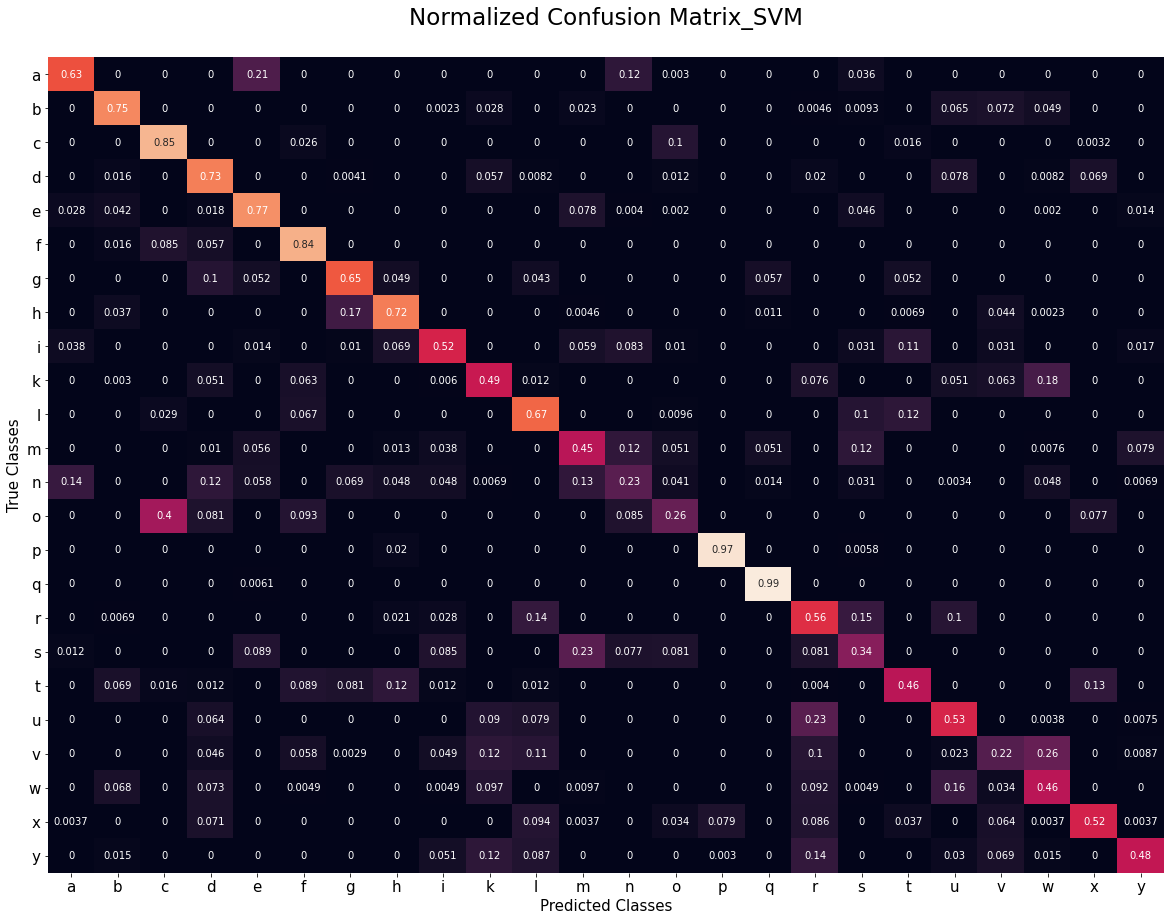

In [ ]:
plt.figure(figsize = (20,15))

sns.heatmap(cm_svm, annot=True , xticklabels = sorted(set(pred_letters_svm)), yticklabels = sorted(set(y_test_letters_svm)),cbar=False)
plt.title('Normalized Confusion Matrix_SVM\n', fontsize = 23)
plt.xlabel("Predicted Classes",fontsize=15)
plt.ylabel("True Classes",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [ ]:
testing_labels

array([ 6.,  5., 10., ...,  2.,  4.,  2.])

In [ ]:
svm_predictions

array([ 6.,  5.,  3., ...,  2., 22.,  2.])

# <h1> 18 . Comaprison</h1>

In [ ]:
del accuracy_metric[2]

In [ ]:
del accuracy_metric[0]

In [ ]:
accuracy_metric

[['The accuracy score for CNN = ', 0.9454824316787507],
 ['RandomForestClassifier', 0.698968209704406],
 ['Acuracy Score for Naive Bayes is : ', 0.2456776352481874],
 ['Accuracy for SVM is : ', 0.5931399888455103]]

In [ ]:
algo_acc = np.transpose(accuracy_metric)
print(algo_acc)

x_plot = algo_acc[0]
y_plot = np.round(np.array(algo_acc[1], dtype=np.float32)*100, 2)


[['The accuracy score for CNN = ' 'RandomForestClassifier'
  'Acuracy Score for Naive Bayes is : ' 'Accuracy for SVM is : ']
 ['0.9454824316787507' '0.698968209704406' '0.2456776352481874'
  '0.5931399888455103']]


In [ ]:
print(x_plot)

['The accuracy score for CNN = ' 'RandomForestClassifier'
 'Acuracy Score for Naive Bayes is : ' 'Accuracy for SVM is : ']


In [ ]:
y_plot

array([94.55, 69.9 , 24.57, 59.31], dtype=float32)

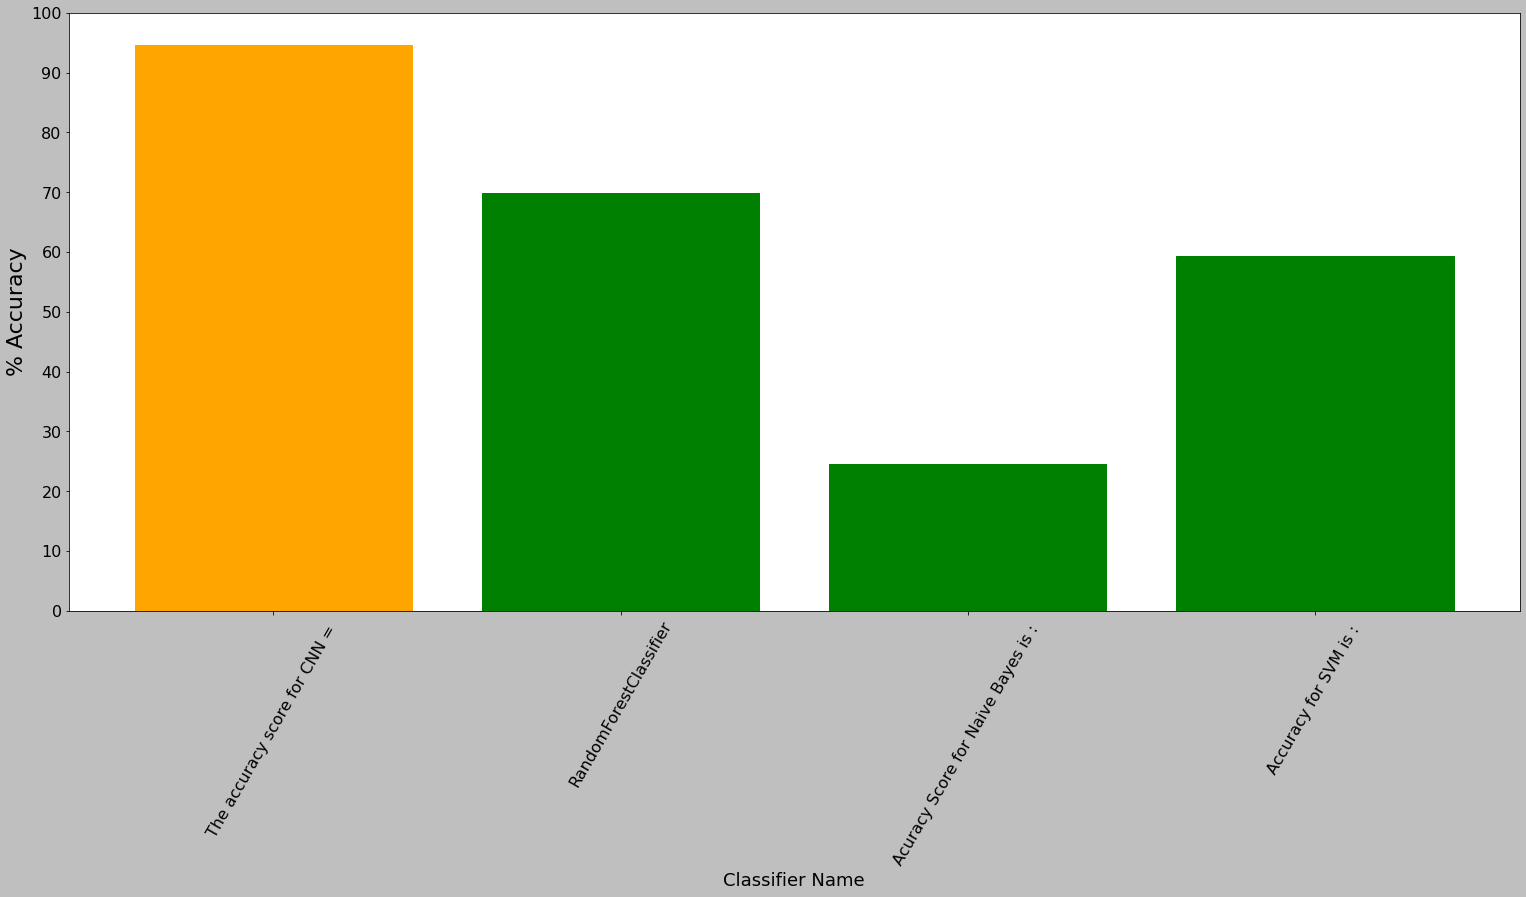

In [ ]:
# We plot bar graphs of accuracies of all models and highlight the models with maximum accuracy in orange color.
fig = plt.figure(figsize=(26,11))
barlist = plt.bar(x_plot,y_plot)
for i in range(len(barlist)):
    if (y_plot[i] == max(y_plot)):
        barlist[i].set_color('orange')
    else:
        barlist[i].set_color('g')
plt.xlabel('Classifier Name', fontsize = 18)
plt.ylabel('% Accuracy', fontsize = 22)
plt.xticks(x_plot, fontsize = 16)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize = 16)
plt.xticks(rotation = 60)
# plt.grid(True).0s 6ms/step - loss: 0.4076 - accuracy: 0.8494
plt.style.use(plt.style.available[8])
plt.savefig('Model_comparison_2.png')
plt.show()


# <h1> 19 . Conclusion</h1>

As , **CNN** offers the **maximum accuracy score(92 %)** , so , it is tempting to chhose the CNN model over all other existing models  .  

# <h1> 20 . Storing the model </h1>

In [ ]:
#storing the weights 
model.save_weights('sign_lan_weights_2.h5')


In [ ]:
#to save the architecture of the model as a json file

with open('sign_lan_model_architecture_2.json','w') as f:
    f.write(model.to_json())

In [ ]:
! pwd 